##### Use AustraliaFiltered.xlsx dataset generated earlier.

- Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
- Find total immigrants from each category by area name and plot barchart for each area
- Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
- Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
- Plot Total Immigrants based on DevelopmenRegion 

  
- Plot immigration trend for India using line plot
- Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
- For the above use area plot with alpha = 0.5


- Compare Immigration Trend for top-5 countires using stacked area plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
aus = pd.read_excel('AustraliaFiltered.xlsx' )
aus.head()

,Country,AreaName,Region,DevName,1980,1981,1982,1983,1984,1985,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,10,20,30,30,70,100,...,100,20,40,70,80,110,180,140,560,4630
1,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,110,110,200,250,140,130,110,110,140,1910
2,Algeria,Africa,Northern Africa,Developing regions,10,50,30,10,20,20,...,20,30,60,20,20,50,30,30,60,730
3,American Samoa,Oceania,Polynesia,Developing regions,0,0,0,0,0,20,...,0,0,0,0,0,0,0,0,10,30
4,Andorra,Europe,Southern Europe,Developed regions,0,0,10,0,0,0,...,0,10,10,0,10,10,0,10,10,100


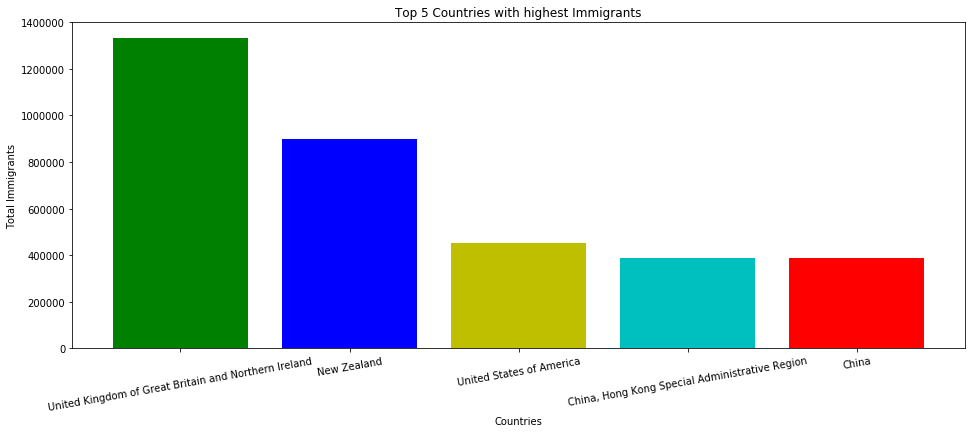

In [3]:
# Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
top_countries = aus.nlargest(5, 'Total')
# print(top_countries)
plt.figure(figsize=(16,6))
plt.bar(top_countries.Country, top_countries.Total , color = 'gbycr')
plt.xlabel('Countries')
plt.ylabel('Total Immigrants')
plt.title('Top 5 Countries with highest Immigrants')
plt.xticks(rotation = 10)
plt.show()

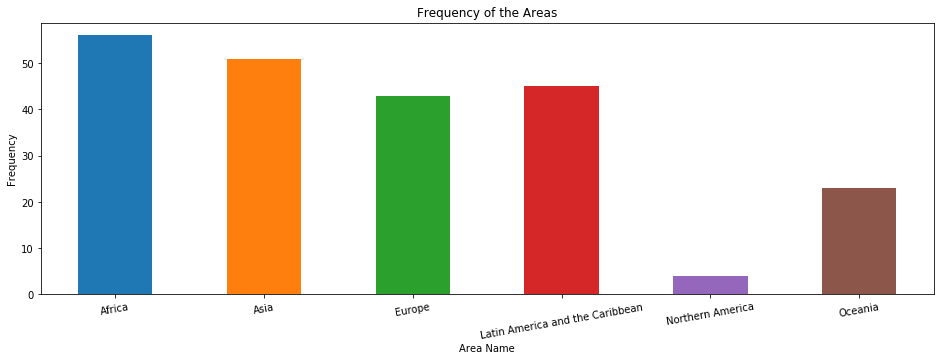

In [4]:
a = aus.groupby('AreaName')
plt.figure(figsize=(16,5))
fg = a.size().plot(kind = 'bar')
plt.xticks(rotation=10)
plt.ylabel('Frequency')
plt.xlabel('Area Name')
plt.title('Frequency of the Areas')
plt.show()

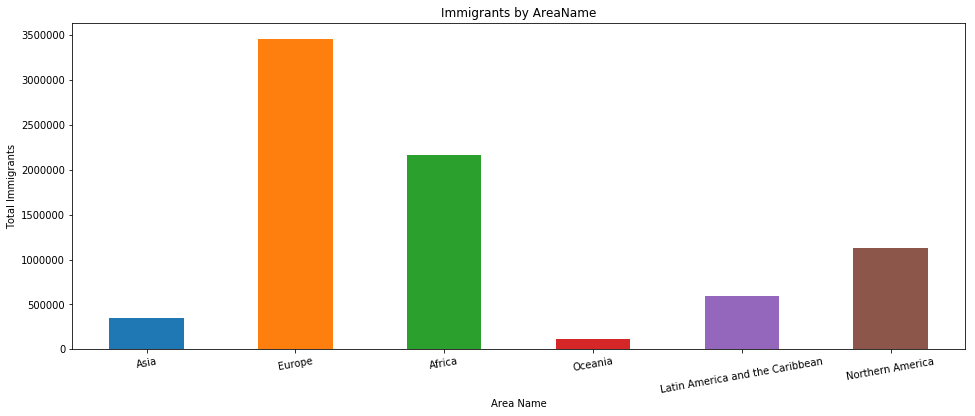

In [5]:
# Find total immigrants from each category by area name and plot barchart for each area
area_name = aus.groupby(['AreaName'],as_index=False).sum()
plt.figure(figsize=(16,6))
ax = area_name.Total.plot(kind = 'bar')
lab = ax.get_xticklabels()
lab = aus.AreaName.unique()
ax.set_xticklabels(lab)
plt.xticks(rotation=10)
plt.ylabel('Total Immigrants')
plt.xlabel('Area Name')
plt.title('Immigrants by AreaName')
plt.show()

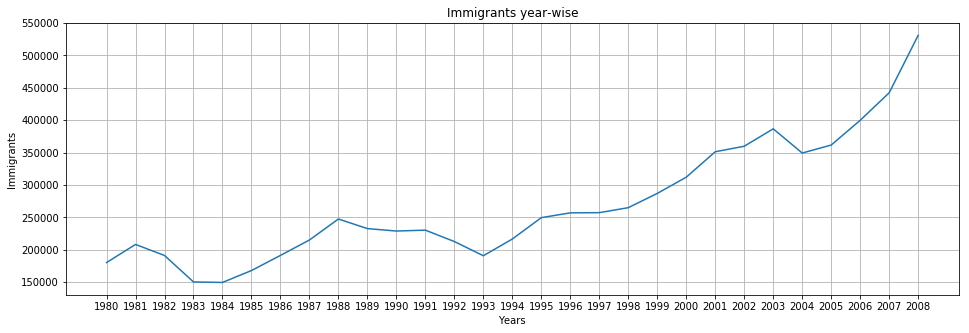

In [6]:
# Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
years = aus.columns[4:len(aus.columns)-1]
i = 0
year_wise_immigrants = []
while i < len(years):
    year_wise_immigrants.append(aus[years[i]].sum(axis = 0))
    i +=1
plt.figure(figsize=(16,5))
plt.plot(years, year_wise_immigrants)
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.title('Immigrants year-wise')
plt.grid() #optional
plt.show()

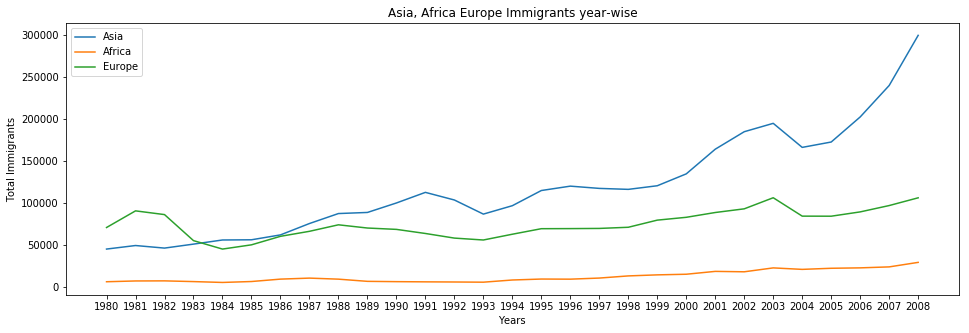

In [36]:
# Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
area_africa = aus[aus['AreaName'] == 'Africa']
area_asia = aus[aus['AreaName'] == 'Asia']
area_europe = aus[aus['AreaName'] == 'Europe']
i = 0
asia_immigrants = []
africa_immigrants = []
europe_immigrants = []
while i < len(years):
    asia_immigrants.append(area_asia[years[i]].sum(axis = 0))
    africa_immigrants.append(area_africa[years[i]].sum(axis = 0))
    europe_immigrants.append(area_europe[years[i]].sum(axis = 0))
    i +=1
    
plt.figure(figsize=(16,5))
plt.plot(years, asia_immigrants,label = 'Asia')
plt.plot(years,africa_immigrants,label = 'Africa')
plt.plot(years, europe_immigrants,label = 'Europe')
plt.xlabel('Years')
plt.ylabel('Total Immigrants')
plt.title('Asia, Africa Europe Immigrants year-wise')
# plt.grid() #optional
plt.legend()
plt.show() 


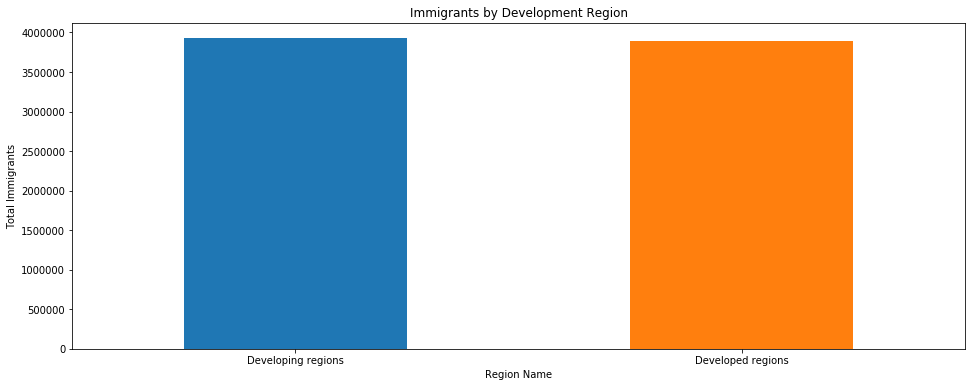

In [26]:
# Plot Total Immigrants based on Development Region
development_region = aus.groupby('DevName').sum()
plt.figure(figsize=(16,6))
ax = development_region.Total.plot(kind = 'bar')
lab = ax.get_xticklabels()
lab = aus.DevName.unique()
ax.set_xticklabels(lab)
plt.xticks(rotation=0)
plt.ylabel('Total Immigrants')
plt.xlabel('Region Name')
plt.title('Immigrants by Development Region')
plt.show()


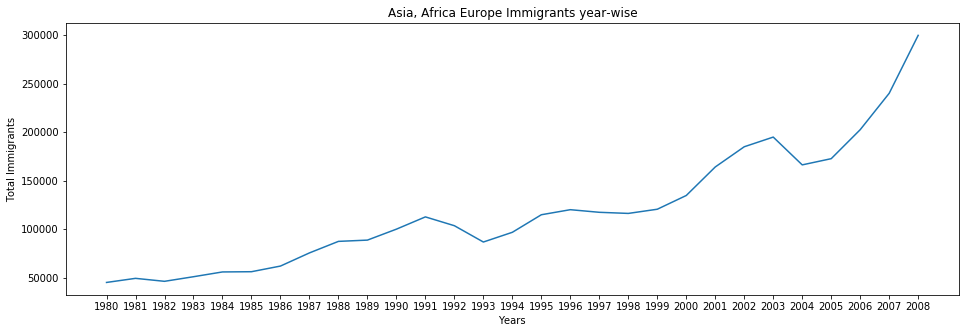

In [27]:
# Plot immigration trend for India using line plot
india = aus[aus['Country'] == 'India']
india_immigrants = []
i = 0
while i < len(years):
    india_immigrants.append(india[years[i]].sum(axis = 0))
    i +=1
plt.figure(figsize=(16,5))
plt.plot(years, asia_immigrants)
plt.xlabel('Years')
plt.ylabel('Total Immigrants')
plt.title('Asia, Africa Europe Immigrants year-wise')
# plt.grid() #optional
plt.show() 

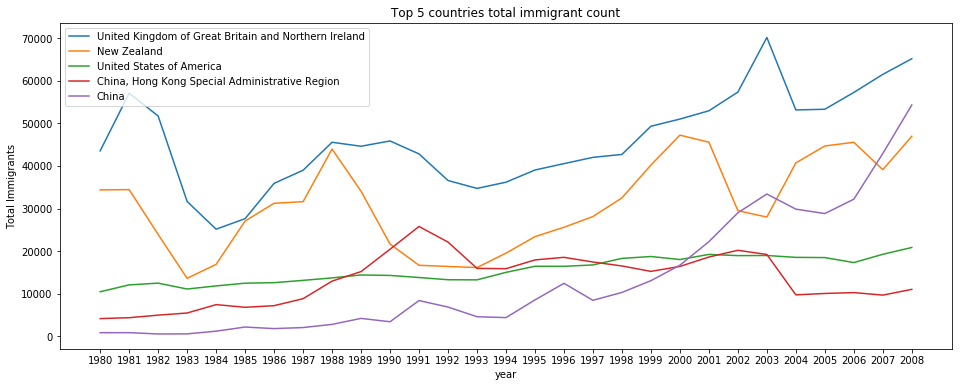

In [53]:
# Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
top_countries = aus.nlargest(5, 'Total')
plt.figure(figsize = (16,6))
for top in top_countries.values:
    country_name = top[0]
    year_count = top[4:33]
    plt.plot(years, year_count,label = country_name)
plt.title('Top 5 countries total immigrant count')
plt.xlabel('year')
plt.ylabel('Total Immigrants')
plt.legend(loc=2)
plt.show()

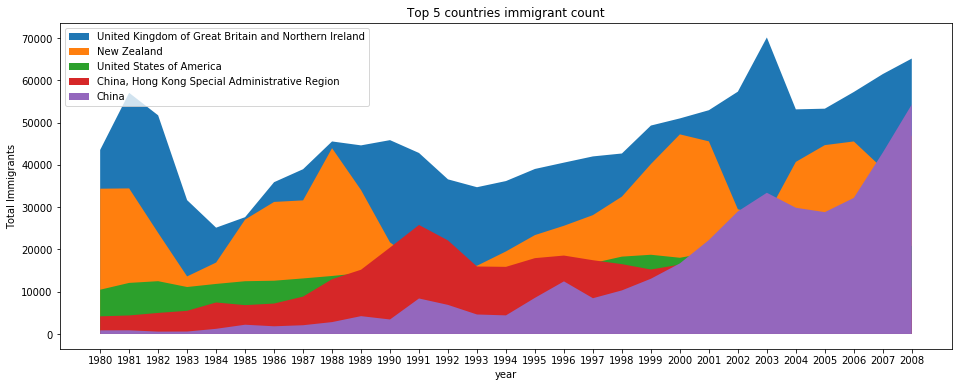

In [126]:
# For the above use area plot with alpha = 0.5

top_countries = aus.nlargest(5, 'Total')
plt.figure(figsize = (16,6))
country_list = top_countries.Country
for i in country_list.values:
    country_count = aus[aus.Country == i][aus.columns[4:len(aus.columns)-1]].sum()
    years = country_count.index
    year_count = country_count.values
    plt.fill_between(years, year_count,label=i)
plt.title('Top 5 countries immigrant count')
plt.xlabel('year')
plt.ylabel('Total Immigrants')
plt.legend(loc=2)
plt.show()

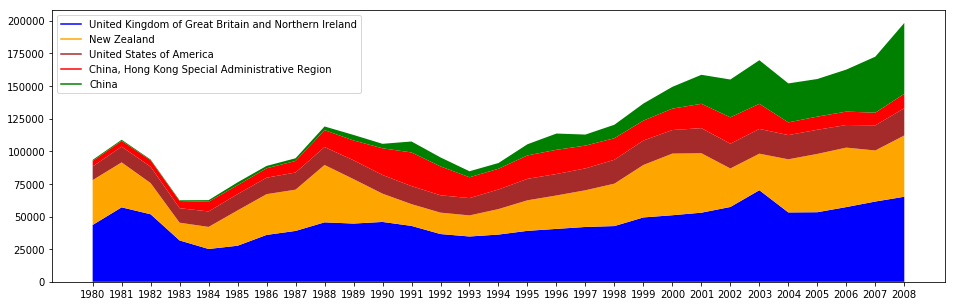

In [139]:
# Compare Immigration Trend for top-5 countires using stacked area plot
top_countries = aus.nlargest(5, 'Total')
country_lists = []
for i in range(len(top_countries.values)):
    country_list = top_countries.values[i]
    country_lists.append(country_list)

uk = list(country_lists[0][4:33])
nz = list(country_lists[1][4:33])
us = list(country_lists[2][4:33])
hk = list(country_lists[3][4:33])
ch = list(country_lists[4][4:33])

plt.figure(figsize=(16,5))
plt.plot([],[],color ='blue',  label='United Kingdom of Great Britain and Northern Ireland')
plt.plot([],[],color ='orange', label='New Zealand')
plt.plot([],[],color ='brown', label='United States of America')
plt.plot([],[], color ='red',label='China, Hong Kong Special Administrative Region')
plt.plot([],[], color ='green',label='China')

plt.stackplot(years, uk, nz, us, hk, ch,colors = ['blue','orange','brown','red','green'])
plt.legend(loc=2)

plt.show()


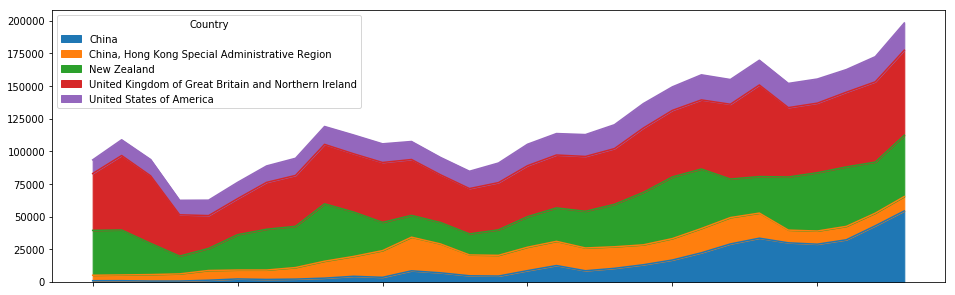

In [129]:
top_countries = aus.nlargest(5,'Total').groupby(['Country'])
top_sum = top_countries[aus.columns[4:len(aus.columns)-1]].sum()
top_sum.T.plot.area(stacked=True,figsize=(16,5))